## creating a world-class Image Classifier

#### first we are going to mention our Stages :

>1. Import data </font>
2. Build model
3. Unfreeze model
4. Find a good learning rate(s)
5. To fine-tune the model train once again
6. Analyze the results

#### We will be working with fastai library version 1 


In [2]:
from fastai import *
from fastai.vision import *

#### fastai supports 4 types of applications :-

 >1. Computer Vision(images, videos) </font>
2. Natural Language Processing(Text)
3. Tabular data(SQL like) 
4. Collaborative filtering(recommendation systems)

# <font color = 'Green'>1- Import Data 
    
where can you get data from?
    
 >1. Academic datasets </font>
2. Kaggle competition datasets

In [ ]:
# getting the data :

path = untar_data(URLs.PETS) 

#### URLs is a class from fastai. datasets, we imported it as from fastai import *
#### PETS is a string constant with the path as ‘https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet
so you can start downloading the data 

#### what is " untar_data " and what does it do ?
it <font color = 'red'> downloads and extracts url </font> , by default to subdirectories of<font color = 'blue'> ~/.fastai </font>, and returns the path to the extracted data. 

we can colclude it with saying that  
<font color = 'purple'>untar_data  </font >will download that to some convenient path and untar it for us and it will then return the value of path
#### path = untar_data(URLs.PETS)

In [4]:
help (untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



 we can see we don't have to pass in a file name **fname** or a destination **dest** , it'll figure them out for us from the URL.
Setting the <font color = 'blue'> force_download </font> flag to 'True' will overwrite any existing copy of the data already present.

In [ ]:
# figuring out what's in this path 
path.ls()
# output --->  ['annotations', 'images']

#### because Path object is much better to use than strings.

<font color = 'purple'>path_img</font> is the path to the images in that dataset.

In [ ]:
path_anno = path/'annotations'
path_img = path/'images'

### get_image_files
will just grab an array of all of the image files based on extension in a path



In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

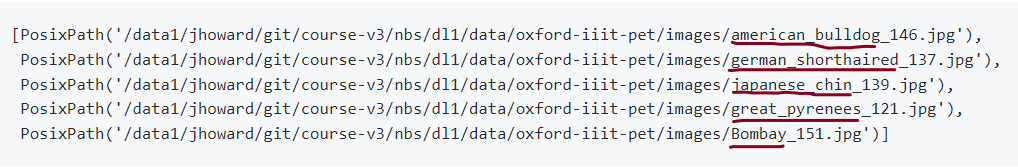

it's obvious that our<font color = 'red'> labels </font> **(things we are trying to predict)** are contained in the file path so we have to extract them 

#### Regular Expressions 
Regular expressions are a way to search a string in the text using <font color ='purple'>pattern matching methods</font>.


In [ ]:
pat = r'/([^/]+)_\d+.jpg$'

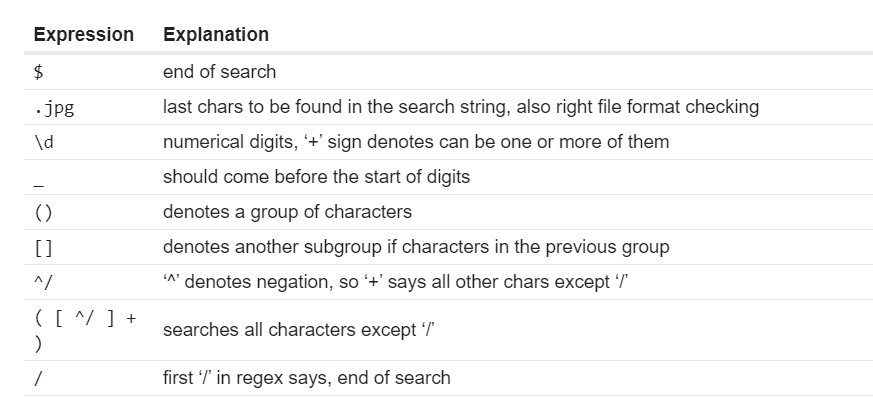

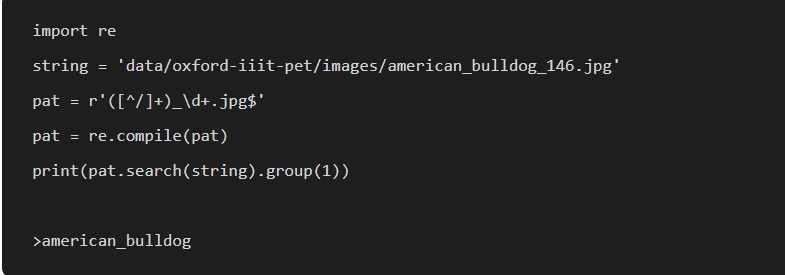

## Loading The Data

In [ ]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

### ImageDataBunch.from_name_re

is going to return a DataBunch object. In fastai, everything you model with is going to be a DataBunch object. Basically DataBunch object contains 2 or 3 datasets <font color=brown>**training data, validation data, and optionally test data** </font> . For each of those, <font color=alchol>it contains your images and your labels, your texts and your labels, or your tabular data and your labels </font>, or so forth. And that all sits there in this one place **( data)**

#### Size =224
**GPU "Graphics processing units"** --->  specialized processing cores that you can use to <font color=Berry>speed computational processes </font>.were initially designed to process images and visual data.it is well-suited to deep learning processes which <font color = 'red'>**require the same process to be performed for numerous data items** </font>.So we actually have to make all of the images the same shape and size.

 

<font color= 'blue'>path_img:-</font>a path containing images 

<font color= 'blue'>fnames:-</font> a list of file names

<font color= 'blue'>pat:</font> a regular expression (i.e. pattern) to be used to extract the label from the file name

<font color= 'blue'>ds_tfm:</font> changes all the image sizes to 224 X 224, Also, all the images get centered, cropped and zoomed a little bit by transformation functions.

<font color= 'blue'>size: </font>what size images do you want to work with.

<font color= 'blue'>bs: </font>batch size (i.e. number of images processed at a time). Set to 16 if memory is not enough

#### data.normalize(imagenet_stats)
The pixel values of images range from 0 to 255. Images contain 3 color channels (Red, Green, and Blue). some channels will be bright, some might be dull. Some might vary so much and some might not vary at all. It helps to train a model if all those 3 channels have got pixel values with a mean of 0 and a standard deviation of 1. Normalization simply does that.



if it is done **incorrectly** it can lead to unrecoverable loss of information, for example **image clipping** (generating values that are below the valid range of the image datatype) or **saturation** (above the valid range).

## Looking at the data

In [ ]:
data.show_batch(rows=3, figsize=(7,6))
# you have to check your data 
#Sometimes images can have text on it,
#or they might be occluded by some other object
#or some of them might be rotated in odd ways.

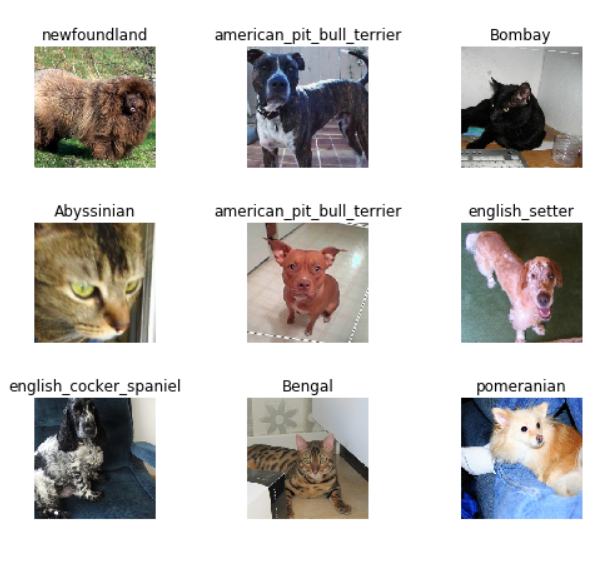

# <font color = 'Green'>2- Build model
    
   A model is trained in fastai using something called a "**learner**".

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

<font color = 'red'>**create_cnn** </font> method resides in fastai.vision.learner class. takes few parameters, first the DataBunch **data** 

#### resNet 34 & resNet 50 (Residual Network)
what are they ? 